In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Import Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('sonar.csv')
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [3]:
X_input = df.iloc[:, :-1]
Y_label = df['Class'].values

In [4]:
X_input

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [5]:
Y_label

array(['Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine',
       'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine',
      

In [6]:
labelencoder_Y = LabelEncoder() 
Y_label = labelencoder_Y.fit_transform(Y_label)
Y_label = Y_label.reshape([208, 1])

In [7]:
Y_label

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [8]:
X_input, Y_label = shuffle(X_input, Y_label, random_state=42)

In [9]:
Y_label

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_input, Y_label, test_size=0.20, random_state=42)

In [11]:
X_train.shape

(166, 60)

In [12]:
X_test.shape

(42, 60)

In [13]:
y_train.shape

(166, 1)

In [14]:
y_test.shape

(42, 1)

In [15]:
model = Sequential()
model.add(Dense(300,input_dim=60, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(200,  activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(100,  activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,  activation = 'sigmoid'))

In [16]:
optz = tf.keras.optimizers.SGD(learning_rate=0.003)

In [17]:
model.compile(optimizer=optz,loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               18300     
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

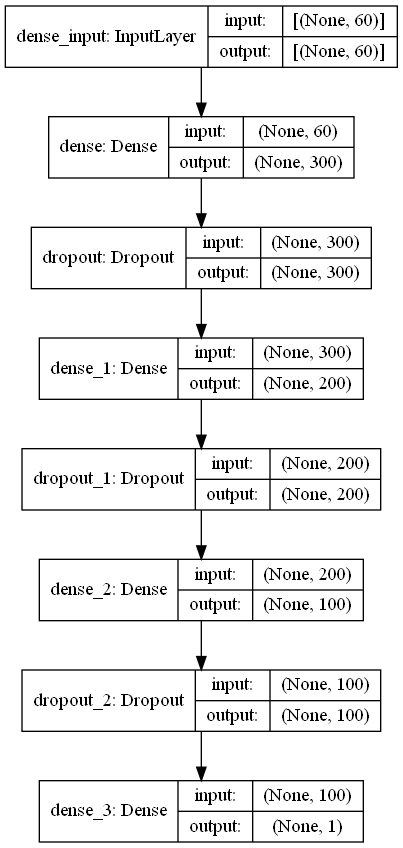

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [20]:
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
6/6 [==============================] - 1s 47ms/step - loss: 0.7401 - accuracy: 0.4578 - val_loss: 0.6908 - val_accuracy: 0.5476
Epoch 2/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.7433 - accuracy: 0.4458 - val_loss: 0.6907 - val_accuracy: 0.5476
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.7123 - accuracy: 0.4759 - val_loss: 0.6907 - val_accuracy: 0.5476
Epoch 4/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.7260 - accuracy: 0.5060 - val_loss: 0.6909 - val_accuracy: 0.5476
Epoch 5/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.7239 - accuracy: 0.4639 - val_loss: 0.6911 - val_accuracy: 0.5714
Epoch 6/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.7278 - accuracy: 0.4639 - val_loss: 0.6915 - val_accuracy: 0.5476
Epoch 7/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6821 - accuracy: 0.5482 - val_loss: 0.6917 - val_accuracy: 0.5476
Epoch 8/1000
6/6 [=

6/6 [==============================] - 0s 8ms/step - loss: 0.6610 - accuracy: 0.5964 - val_loss: 0.7028 - val_accuracy: 0.4524
Epoch 60/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6591 - accuracy: 0.5964 - val_loss: 0.7029 - val_accuracy: 0.4524
Epoch 61/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.7059 - accuracy: 0.4699 - val_loss: 0.7030 - val_accuracy: 0.4524
Epoch 62/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6993 - accuracy: 0.5602 - val_loss: 0.7037 - val_accuracy: 0.4524
Epoch 63/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.7037 - accuracy: 0.5000 - val_loss: 0.7033 - val_accuracy: 0.4524
Epoch 64/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6910 - accuracy: 0.5301 - val_loss: 0.7040 - val_accuracy: 0.4524
Epoch 65/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6911 - accuracy: 0.5000 - val_loss: 0.7043 - val_accuracy: 0.4524
Epoch 66/1000
6/6 [========

6/6 [==============================] - 0s 9ms/step - loss: 0.6717 - accuracy: 0.5723 - val_loss: 0.7002 - val_accuracy: 0.4524
Epoch 118/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6933 - accuracy: 0.5301 - val_loss: 0.6996 - val_accuracy: 0.4524
Epoch 119/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.7005 - accuracy: 0.4880 - val_loss: 0.6994 - val_accuracy: 0.4524
Epoch 120/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6867 - accuracy: 0.5301 - val_loss: 0.6990 - val_accuracy: 0.4524
Epoch 121/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6782 - accuracy: 0.5663 - val_loss: 0.6992 - val_accuracy: 0.4524
Epoch 122/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6715 - accuracy: 0.5843 - val_loss: 0.6988 - val_accuracy: 0.4524
Epoch 123/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6982 - accuracy: 0.5301 - val_loss: 0.6987 - val_accuracy: 0.4524
Epoch 124/1000
6/6 [=

Epoch 175/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6807 - accuracy: 0.5602 - val_loss: 0.6918 - val_accuracy: 0.4524
Epoch 176/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6826 - accuracy: 0.5422 - val_loss: 0.6916 - val_accuracy: 0.4524
Epoch 177/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6925 - accuracy: 0.5060 - val_loss: 0.6921 - val_accuracy: 0.4524
Epoch 178/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6768 - accuracy: 0.5663 - val_loss: 0.6913 - val_accuracy: 0.4524
Epoch 179/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6699 - accuracy: 0.5843 - val_loss: 0.6917 - val_accuracy: 0.4524
Epoch 180/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6694 - accuracy: 0.5964 - val_loss: 0.6920 - val_accuracy: 0.4524
Epoch 181/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6795 - accuracy: 0.5361 - val_loss: 0.6918 - val_accuracy: 0.4524
Epoch 

6/6 [==============================] - 0s 9ms/step - loss: 0.6652 - accuracy: 0.5783 - val_loss: 0.6876 - val_accuracy: 0.4762
Epoch 233/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6745 - accuracy: 0.5422 - val_loss: 0.6871 - val_accuracy: 0.4762
Epoch 234/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6726 - accuracy: 0.6024 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 235/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6908 - accuracy: 0.5422 - val_loss: 0.6844 - val_accuracy: 0.5000
Epoch 236/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6553 - accuracy: 0.5904 - val_loss: 0.6837 - val_accuracy: 0.5238
Epoch 237/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6791 - accuracy: 0.5663 - val_loss: 0.6841 - val_accuracy: 0.5238
Epoch 238/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.6586 - accuracy: 0.6386 - val_loss: 0.6840 - val_accuracy: 0.5238
Epoch 239/1000
6/6 [=

Epoch 290/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6649 - accuracy: 0.5904 - val_loss: 0.6784 - val_accuracy: 0.5238
Epoch 291/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6515 - accuracy: 0.5783 - val_loss: 0.6777 - val_accuracy: 0.5238
Epoch 292/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6547 - accuracy: 0.5783 - val_loss: 0.6772 - val_accuracy: 0.5238
Epoch 293/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6793 - accuracy: 0.6084 - val_loss: 0.6777 - val_accuracy: 0.5238
Epoch 294/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6611 - accuracy: 0.5964 - val_loss: 0.6775 - val_accuracy: 0.5238
Epoch 295/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6534 - accuracy: 0.6205 - val_loss: 0.6772 - val_accuracy: 0.5238
Epoch 296/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6691 - accuracy: 0.6084 - val_loss: 0.6769 - val_accuracy: 0.5238
Epoch 

6/6 [==============================] - 0s 9ms/step - loss: 0.6465 - accuracy: 0.6024 - val_loss: 0.6666 - val_accuracy: 0.5952
Epoch 348/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6523 - accuracy: 0.6145 - val_loss: 0.6665 - val_accuracy: 0.5952
Epoch 349/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6546 - accuracy: 0.6265 - val_loss: 0.6671 - val_accuracy: 0.5952
Epoch 350/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6442 - accuracy: 0.6506 - val_loss: 0.6669 - val_accuracy: 0.5952
Epoch 351/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6466 - accuracy: 0.6386 - val_loss: 0.6670 - val_accuracy: 0.5952
Epoch 352/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6604 - accuracy: 0.6325 - val_loss: 0.6678 - val_accuracy: 0.5714
Epoch 353/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6721 - accuracy: 0.5964 - val_loss: 0.6681 - val_accuracy: 0.5714
Epoch 354/1000
6/6 [=

Epoch 405/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6668 - accuracy: 0.5964 - val_loss: 0.6549 - val_accuracy: 0.6190
Epoch 406/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6585 - accuracy: 0.6446 - val_loss: 0.6545 - val_accuracy: 0.6190
Epoch 407/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6577 - accuracy: 0.6084 - val_loss: 0.6541 - val_accuracy: 0.6190
Epoch 408/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6595 - accuracy: 0.6145 - val_loss: 0.6526 - val_accuracy: 0.6190
Epoch 409/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6202 - accuracy: 0.6988 - val_loss: 0.6527 - val_accuracy: 0.6190
Epoch 410/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6393 - accuracy: 0.6566 - val_loss: 0.6530 - val_accuracy: 0.6190
Epoch 411/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6420 - accuracy: 0.6506 - val_loss: 0.6532 - val_accuracy: 0.6190
Epoch 

Epoch 463/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6425 - accuracy: 0.7048 - val_loss: 0.6425 - val_accuracy: 0.6190
Epoch 464/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6318 - accuracy: 0.6566 - val_loss: 0.6427 - val_accuracy: 0.6190
Epoch 465/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6424 - accuracy: 0.6386 - val_loss: 0.6426 - val_accuracy: 0.6190
Epoch 466/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6130 - accuracy: 0.7289 - val_loss: 0.6433 - val_accuracy: 0.6190
Epoch 467/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6383 - accuracy: 0.6145 - val_loss: 0.6427 - val_accuracy: 0.6190
Epoch 468/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6474 - accuracy: 0.6205 - val_loss: 0.6426 - val_accuracy: 0.6190
Epoch 469/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6408 - accuracy: 0.6566 - val_loss: 0.6431 - val_accuracy: 0.6190
Epoch 

Epoch 521/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6279 - accuracy: 0.6747 - val_loss: 0.6350 - val_accuracy: 0.6190
Epoch 522/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6177 - accuracy: 0.6627 - val_loss: 0.6332 - val_accuracy: 0.6190
Epoch 523/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6478 - accuracy: 0.5964 - val_loss: 0.6321 - val_accuracy: 0.6190
Epoch 524/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6560 - accuracy: 0.6084 - val_loss: 0.6302 - val_accuracy: 0.6429
Epoch 525/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6394 - accuracy: 0.6386 - val_loss: 0.6310 - val_accuracy: 0.6429
Epoch 526/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6415 - accuracy: 0.5964 - val_loss: 0.6304 - val_accuracy: 0.6429
Epoch 527/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6150 - accuracy: 0.6446 - val_loss: 0.6306 - val_accuracy: 0.6190
Epoch 

Epoch 579/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6165 - accuracy: 0.6928 - val_loss: 0.6154 - val_accuracy: 0.6429
Epoch 580/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5999 - accuracy: 0.6867 - val_loss: 0.6161 - val_accuracy: 0.6429
Epoch 581/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6071 - accuracy: 0.6867 - val_loss: 0.6151 - val_accuracy: 0.6429
Epoch 582/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6088 - accuracy: 0.6867 - val_loss: 0.6119 - val_accuracy: 0.6667
Epoch 583/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6283 - accuracy: 0.6325 - val_loss: 0.6109 - val_accuracy: 0.6667
Epoch 584/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6177 - accuracy: 0.6566 - val_loss: 0.6111 - val_accuracy: 0.6667
Epoch 585/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6223 - accuracy: 0.6265 - val_loss: 0.6114 - val_accuracy: 0.6667
Epoch 

Epoch 637/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5895 - accuracy: 0.6988 - val_loss: 0.5957 - val_accuracy: 0.6905
Epoch 638/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6305 - accuracy: 0.6506 - val_loss: 0.5956 - val_accuracy: 0.6905
Epoch 639/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6114 - accuracy: 0.7108 - val_loss: 0.5935 - val_accuracy: 0.6905
Epoch 640/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6170 - accuracy: 0.6566 - val_loss: 0.5940 - val_accuracy: 0.6905
Epoch 641/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6083 - accuracy: 0.6747 - val_loss: 0.5952 - val_accuracy: 0.6905
Epoch 642/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5871 - accuracy: 0.6988 - val_loss: 0.5963 - val_accuracy: 0.6905
Epoch 643/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6156 - accuracy: 0.6446 - val_loss: 0.5964 - val_accuracy: 0.6905
Epoch 

6/6 [==============================] - 0s 9ms/step - loss: 0.6013 - accuracy: 0.7169 - val_loss: 0.5742 - val_accuracy: 0.6905
Epoch 695/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5907 - accuracy: 0.6867 - val_loss: 0.5728 - val_accuracy: 0.6905
Epoch 696/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6002 - accuracy: 0.6205 - val_loss: 0.5722 - val_accuracy: 0.6905
Epoch 697/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5797 - accuracy: 0.6988 - val_loss: 0.5745 - val_accuracy: 0.6905
Epoch 698/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5699 - accuracy: 0.7229 - val_loss: 0.5732 - val_accuracy: 0.6905
Epoch 699/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5859 - accuracy: 0.7048 - val_loss: 0.5716 - val_accuracy: 0.6905
Epoch 700/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5957 - accuracy: 0.6988 - val_loss: 0.5726 - val_accuracy: 0.6905
Epoch 701/1000
6/6 [=

6/6 [==============================] - 0s 8ms/step - loss: 0.5477 - accuracy: 0.7651 - val_loss: 0.5513 - val_accuracy: 0.7381
Epoch 752/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5400 - accuracy: 0.7470 - val_loss: 0.5533 - val_accuracy: 0.7381
Epoch 753/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5799 - accuracy: 0.7289 - val_loss: 0.5515 - val_accuracy: 0.7381
Epoch 754/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5492 - accuracy: 0.7169 - val_loss: 0.5523 - val_accuracy: 0.7381
Epoch 755/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5908 - accuracy: 0.7108 - val_loss: 0.5563 - val_accuracy: 0.7143
Epoch 756/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5657 - accuracy: 0.7169 - val_loss: 0.5572 - val_accuracy: 0.7143
Epoch 757/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5603 - accuracy: 0.6988 - val_loss: 0.5575 - val_accuracy: 0.7143
Epoch 758/1000
6/6 [=

Epoch 809/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5447 - accuracy: 0.7470 - val_loss: 0.5276 - val_accuracy: 0.7857
Epoch 810/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5489 - accuracy: 0.7349 - val_loss: 0.5323 - val_accuracy: 0.7381
Epoch 811/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5929 - accuracy: 0.6928 - val_loss: 0.5328 - val_accuracy: 0.7381
Epoch 812/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5565 - accuracy: 0.7289 - val_loss: 0.5312 - val_accuracy: 0.7381
Epoch 813/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5593 - accuracy: 0.7229 - val_loss: 0.5296 - val_accuracy: 0.7619
Epoch 814/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5528 - accuracy: 0.7349 - val_loss: 0.5261 - val_accuracy: 0.7619
Epoch 815/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5612 - accuracy: 0.7048 - val_loss: 0.5212 - val_accuracy: 0.7619
Epoch 

Epoch 867/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5415 - accuracy: 0.7530 - val_loss: 0.5069 - val_accuracy: 0.7857
Epoch 868/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5637 - accuracy: 0.7169 - val_loss: 0.5052 - val_accuracy: 0.7857
Epoch 869/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5358 - accuracy: 0.7530 - val_loss: 0.5060 - val_accuracy: 0.7857
Epoch 870/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5299 - accuracy: 0.7289 - val_loss: 0.5019 - val_accuracy: 0.7619
Epoch 871/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5276 - accuracy: 0.7651 - val_loss: 0.4982 - val_accuracy: 0.7619
Epoch 872/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5330 - accuracy: 0.7470 - val_loss: 0.5007 - val_accuracy: 0.7619
Epoch 873/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5320 - accuracy: 0.7590 - val_loss: 0.5008 - val_accuracy: 0.7619
Epoch 

Epoch 925/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5283 - accuracy: 0.7470 - val_loss: 0.4693 - val_accuracy: 0.7619
Epoch 926/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.4930 - accuracy: 0.7892 - val_loss: 0.4714 - val_accuracy: 0.7619
Epoch 927/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5438 - accuracy: 0.7651 - val_loss: 0.4675 - val_accuracy: 0.7619
Epoch 928/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5185 - accuracy: 0.7952 - val_loss: 0.4690 - val_accuracy: 0.7619
Epoch 929/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5032 - accuracy: 0.7831 - val_loss: 0.4725 - val_accuracy: 0.7619
Epoch 930/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.4946 - accuracy: 0.7892 - val_loss: 0.4728 - val_accuracy: 0.7619
Epoch 931/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5363 - accuracy: 0.7470 - val_loss: 0.4791 - val_accuracy: 0.7619
Epoch 

Epoch 983/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.5288 - accuracy: 0.7470 - val_loss: 0.4690 - val_accuracy: 0.7857
Epoch 984/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.4917 - accuracy: 0.7651 - val_loss: 0.4554 - val_accuracy: 0.7857
Epoch 985/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.4759 - accuracy: 0.8012 - val_loss: 0.4550 - val_accuracy: 0.7619
Epoch 986/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5098 - accuracy: 0.7470 - val_loss: 0.4528 - val_accuracy: 0.7857
Epoch 987/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5215 - accuracy: 0.7530 - val_loss: 0.4485 - val_accuracy: 0.7857
Epoch 988/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.4914 - accuracy: 0.7831 - val_loss: 0.4498 - val_accuracy: 0.7857
Epoch 989/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5237 - accuracy: 0.7470 - val_loss: 0.4468 - val_accuracy: 0.7857
Epoch 

In [21]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7619


[0.46070072054862976, 0.761904776096344]

In [22]:
model = Sequential()
model.add(Dense(60,input_dim=60, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,  activation = 'sigmoid'))

In [23]:
optz = tf.keras.optimizers.SGD(learning_rate=0.03)

In [24]:
model.compile(optimizer=optz,loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
6/6 [==============================] - 0s 30ms/step - loss: 0.6692 - accuracy: 0.5904 - val_loss: 0.6868 - val_accuracy: 0.4524
Epoch 2/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.6662 - accuracy: 0.6024 - val_loss: 0.6831 - val_accuracy: 0.4524
Epoch 3/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.6769 - accuracy: 0.5663 - val_loss: 0.6879 - val_accuracy: 0.4524
Epoch 4/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.6728 - accuracy: 0.5542 - val_loss: 0.6898 - val_accuracy: 0.4524
Epoch 5/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.6724 - accuracy: 0.5482 - val_loss: 0.6848 - val_accuracy: 0.4524
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.6543 - accuracy: 0.5964 - val_loss: 0.6756 - val_accuracy: 0.4524
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.6634 - accuracy: 0.5602 - val_loss: 0.6753 - val_accuracy: 0.4524
Epoch 8/1000
6/6 [=

6/6 [==============================] - 0s 7ms/step - loss: 0.5776 - accuracy: 0.7169 - val_loss: 0.5972 - val_accuracy: 0.7381
Epoch 60/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.5833 - accuracy: 0.6988 - val_loss: 0.5952 - val_accuracy: 0.7381
Epoch 61/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.5850 - accuracy: 0.7289 - val_loss: 0.5981 - val_accuracy: 0.6905
Epoch 62/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.5899 - accuracy: 0.7048 - val_loss: 0.6000 - val_accuracy: 0.6667
Epoch 63/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.5907 - accuracy: 0.6988 - val_loss: 0.5910 - val_accuracy: 0.7619
Epoch 64/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.5814 - accuracy: 0.7349 - val_loss: 0.5872 - val_accuracy: 0.7381
Epoch 65/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5805 - accuracy: 0.7410 - val_loss: 0.5919 - val_accuracy: 0.7619
Epoch 66/1000
6/6 [========

6/6 [==============================] - 0s 7ms/step - loss: 0.5419 - accuracy: 0.7229 - val_loss: 0.5176 - val_accuracy: 0.7619
Epoch 118/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5278 - accuracy: 0.7711 - val_loss: 0.5171 - val_accuracy: 0.7381
Epoch 119/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.5302 - accuracy: 0.7831 - val_loss: 0.5235 - val_accuracy: 0.7381
Epoch 120/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.5237 - accuracy: 0.7590 - val_loss: 0.5269 - val_accuracy: 0.7619
Epoch 121/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.4915 - accuracy: 0.8072 - val_loss: 0.5249 - val_accuracy: 0.7619
Epoch 122/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.4984 - accuracy: 0.8012 - val_loss: 0.5226 - val_accuracy: 0.7619
Epoch 123/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.5413 - accuracy: 0.7410 - val_loss: 0.5178 - val_accuracy: 0.7381
Epoch 124/1000
6/6 [=

Epoch 175/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4594 - accuracy: 0.7952 - val_loss: 0.4771 - val_accuracy: 0.7619
Epoch 176/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.4967 - accuracy: 0.7711 - val_loss: 0.4706 - val_accuracy: 0.7619
Epoch 177/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4919 - accuracy: 0.7711 - val_loss: 0.4614 - val_accuracy: 0.8333
Epoch 178/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.4542 - accuracy: 0.8253 - val_loss: 0.4708 - val_accuracy: 0.7381
Epoch 179/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.4701 - accuracy: 0.7952 - val_loss: 0.4663 - val_accuracy: 0.7619
Epoch 180/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4986 - accuracy: 0.7771 - val_loss: 0.4880 - val_accuracy: 0.7619
Epoch 181/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4458 - accuracy: 0.8133 - val_loss: 0.4711 - val_accuracy: 0.7857
Epoch 

Epoch 233/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.4360 - accuracy: 0.8133 - val_loss: 0.4173 - val_accuracy: 0.8095
Epoch 234/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4232 - accuracy: 0.8133 - val_loss: 0.4127 - val_accuracy: 0.8333
Epoch 235/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4407 - accuracy: 0.8253 - val_loss: 0.4284 - val_accuracy: 0.8333
Epoch 236/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4526 - accuracy: 0.8434 - val_loss: 0.4161 - val_accuracy: 0.8333
Epoch 237/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.4200 - accuracy: 0.8133 - val_loss: 0.4253 - val_accuracy: 0.8333
Epoch 238/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4543 - accuracy: 0.8253 - val_loss: 0.4335 - val_accuracy: 0.7857
Epoch 239/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4430 - accuracy: 0.8193 - val_loss: 0.4282 - val_accuracy: 0.7857
Epoch 

Epoch 291/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4123 - accuracy: 0.8614 - val_loss: 0.4004 - val_accuracy: 0.8095
Epoch 292/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3959 - accuracy: 0.8614 - val_loss: 0.3960 - val_accuracy: 0.8333
Epoch 293/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3899 - accuracy: 0.8494 - val_loss: 0.4058 - val_accuracy: 0.8095
Epoch 294/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3990 - accuracy: 0.8554 - val_loss: 0.3937 - val_accuracy: 0.8571
Epoch 295/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3721 - accuracy: 0.8614 - val_loss: 0.4133 - val_accuracy: 0.8333
Epoch 296/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3889 - accuracy: 0.8133 - val_loss: 0.3989 - val_accuracy: 0.8095
Epoch 297/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4287 - accuracy: 0.8072 - val_loss: 0.3945 - val_accuracy: 0.8333
Epoch 

Epoch 349/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3932 - accuracy: 0.8253 - val_loss: 0.3754 - val_accuracy: 0.8333
Epoch 350/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.3655 - accuracy: 0.8313 - val_loss: 0.3930 - val_accuracy: 0.8333
Epoch 351/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3850 - accuracy: 0.8554 - val_loss: 0.3686 - val_accuracy: 0.8333
Epoch 352/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3695 - accuracy: 0.8554 - val_loss: 0.3732 - val_accuracy: 0.8333
Epoch 353/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.3750 - accuracy: 0.8434 - val_loss: 0.3760 - val_accuracy: 0.8333
Epoch 354/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3858 - accuracy: 0.8313 - val_loss: 0.3933 - val_accuracy: 0.8333
Epoch 355/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3685 - accuracy: 0.8494 - val_loss: 0.3885 - val_accuracy: 0.8571
Epoch 

Epoch 407/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3811 - accuracy: 0.8373 - val_loss: 0.3864 - val_accuracy: 0.8333
Epoch 408/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3126 - accuracy: 0.8855 - val_loss: 0.3663 - val_accuracy: 0.8333
Epoch 409/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3518 - accuracy: 0.8735 - val_loss: 0.3721 - val_accuracy: 0.8333
Epoch 410/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3390 - accuracy: 0.8554 - val_loss: 0.3739 - val_accuracy: 0.8333
Epoch 411/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3023 - accuracy: 0.9036 - val_loss: 0.3643 - val_accuracy: 0.8333
Epoch 412/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3554 - accuracy: 0.8554 - val_loss: 0.3795 - val_accuracy: 0.8095
Epoch 413/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3582 - accuracy: 0.8614 - val_loss: 0.3855 - val_accuracy: 0.8571
Epoch 

Epoch 465/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3485 - accuracy: 0.8675 - val_loss: 0.3630 - val_accuracy: 0.8333
Epoch 466/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.3505 - accuracy: 0.8313 - val_loss: 0.3616 - val_accuracy: 0.8095
Epoch 467/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3339 - accuracy: 0.8795 - val_loss: 0.3643 - val_accuracy: 0.8095
Epoch 468/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3513 - accuracy: 0.8554 - val_loss: 0.3639 - val_accuracy: 0.8333
Epoch 469/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3212 - accuracy: 0.8916 - val_loss: 0.3738 - val_accuracy: 0.8333
Epoch 470/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.3400 - accuracy: 0.8735 - val_loss: 0.3540 - val_accuracy: 0.8333
Epoch 471/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3401 - accuracy: 0.8494 - val_loss: 0.3448 - val_accuracy: 0.8333
Epoch 

Epoch 523/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3197 - accuracy: 0.8675 - val_loss: 0.3569 - val_accuracy: 0.8095
Epoch 524/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3154 - accuracy: 0.8675 - val_loss: 0.3565 - val_accuracy: 0.8095
Epoch 525/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3078 - accuracy: 0.8855 - val_loss: 0.3787 - val_accuracy: 0.8095
Epoch 526/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3302 - accuracy: 0.8675 - val_loss: 0.3537 - val_accuracy: 0.8095
Epoch 527/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2995 - accuracy: 0.8976 - val_loss: 0.3640 - val_accuracy: 0.8333
Epoch 528/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3069 - accuracy: 0.9036 - val_loss: 0.3556 - val_accuracy: 0.8095
Epoch 529/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3039 - accuracy: 0.8795 - val_loss: 0.3494 - val_accuracy: 0.7857
Epoch 

Epoch 581/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3000 - accuracy: 0.8795 - val_loss: 0.3448 - val_accuracy: 0.8095
Epoch 582/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2896 - accuracy: 0.8916 - val_loss: 0.3511 - val_accuracy: 0.8095
Epoch 583/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2853 - accuracy: 0.8735 - val_loss: 0.3453 - val_accuracy: 0.8095
Epoch 584/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2972 - accuracy: 0.8735 - val_loss: 0.3486 - val_accuracy: 0.8095
Epoch 585/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2591 - accuracy: 0.9157 - val_loss: 0.3428 - val_accuracy: 0.8095
Epoch 586/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2728 - accuracy: 0.9157 - val_loss: 0.3514 - val_accuracy: 0.8095
Epoch 587/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3043 - accuracy: 0.8916 - val_loss: 0.3750 - val_accuracy: 0.8333
Epoch 

Epoch 639/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2769 - accuracy: 0.9217 - val_loss: 0.3398 - val_accuracy: 0.8333
Epoch 640/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.2475 - accuracy: 0.9337 - val_loss: 0.3422 - val_accuracy: 0.8095
Epoch 641/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2675 - accuracy: 0.8976 - val_loss: 0.3365 - val_accuracy: 0.8095
Epoch 642/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.2566 - accuracy: 0.8916 - val_loss: 0.3467 - val_accuracy: 0.8095
Epoch 643/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2652 - accuracy: 0.9157 - val_loss: 0.3640 - val_accuracy: 0.8333
Epoch 644/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3128 - accuracy: 0.8795 - val_loss: 0.3584 - val_accuracy: 0.8095
Epoch 645/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.2553 - accuracy: 0.9096 - val_loss: 0.3478 - val_accuracy: 0.8095
Epoch 

Epoch 697/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2537 - accuracy: 0.9096 - val_loss: 0.3282 - val_accuracy: 0.8095
Epoch 698/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2569 - accuracy: 0.8735 - val_loss: 0.3533 - val_accuracy: 0.8333
Epoch 699/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2474 - accuracy: 0.9036 - val_loss: 0.3330 - val_accuracy: 0.8095
Epoch 700/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2464 - accuracy: 0.9036 - val_loss: 0.3335 - val_accuracy: 0.8095
Epoch 701/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2683 - accuracy: 0.8916 - val_loss: 0.3324 - val_accuracy: 0.8095
Epoch 702/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2665 - accuracy: 0.8916 - val_loss: 0.3481 - val_accuracy: 0.8095
Epoch 703/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2750 - accuracy: 0.8855 - val_loss: 0.3325 - val_accuracy: 0.8095
Epoch 

Epoch 755/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2482 - accuracy: 0.8916 - val_loss: 0.3257 - val_accuracy: 0.8095
Epoch 756/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2496 - accuracy: 0.8855 - val_loss: 0.3460 - val_accuracy: 0.8095
Epoch 757/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2363 - accuracy: 0.9157 - val_loss: 0.3467 - val_accuracy: 0.7857
Epoch 758/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.2247 - accuracy: 0.9398 - val_loss: 0.3443 - val_accuracy: 0.8095
Epoch 759/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2496 - accuracy: 0.9036 - val_loss: 0.3818 - val_accuracy: 0.8095
Epoch 760/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2644 - accuracy: 0.8855 - val_loss: 0.3595 - val_accuracy: 0.8095
Epoch 761/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2197 - accuracy: 0.9096 - val_loss: 0.3358 - val_accuracy: 0.8095
Epoch 

Epoch 813/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2470 - accuracy: 0.8916 - val_loss: 0.3596 - val_accuracy: 0.8333
Epoch 814/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2131 - accuracy: 0.9277 - val_loss: 0.3566 - val_accuracy: 0.8333
Epoch 815/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2190 - accuracy: 0.9398 - val_loss: 0.3462 - val_accuracy: 0.8333
Epoch 816/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2329 - accuracy: 0.9157 - val_loss: 0.3598 - val_accuracy: 0.8333
Epoch 817/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2394 - accuracy: 0.9036 - val_loss: 0.3542 - val_accuracy: 0.8333
Epoch 818/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2210 - accuracy: 0.9096 - val_loss: 0.3670 - val_accuracy: 0.8333
Epoch 819/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2329 - accuracy: 0.9096 - val_loss: 0.3447 - val_accuracy: 0.8095
Epoch 

Epoch 871/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2465 - accuracy: 0.9096 - val_loss: 0.3527 - val_accuracy: 0.8095
Epoch 872/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.1989 - accuracy: 0.9458 - val_loss: 0.3338 - val_accuracy: 0.8095
Epoch 873/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2119 - accuracy: 0.9096 - val_loss: 0.3439 - val_accuracy: 0.8095
Epoch 874/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2119 - accuracy: 0.9157 - val_loss: 0.3341 - val_accuracy: 0.8571
Epoch 875/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2490 - accuracy: 0.9096 - val_loss: 0.3329 - val_accuracy: 0.8095
Epoch 876/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2247 - accuracy: 0.9096 - val_loss: 0.3474 - val_accuracy: 0.8333
Epoch 877/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2298 - accuracy: 0.9157 - val_loss: 0.3457 - val_accuracy: 0.8095
Epoch 

Epoch 929/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2144 - accuracy: 0.9277 - val_loss: 0.3439 - val_accuracy: 0.8095
Epoch 930/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1941 - accuracy: 0.9578 - val_loss: 0.3428 - val_accuracy: 0.8095
Epoch 931/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2233 - accuracy: 0.9096 - val_loss: 0.3672 - val_accuracy: 0.8095
Epoch 932/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2057 - accuracy: 0.9458 - val_loss: 0.3477 - val_accuracy: 0.8095
Epoch 933/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2040 - accuracy: 0.9337 - val_loss: 0.3661 - val_accuracy: 0.8333
Epoch 934/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1714 - accuracy: 0.9458 - val_loss: 0.3428 - val_accuracy: 0.8095
Epoch 935/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1771 - accuracy: 0.9337 - val_loss: 0.3706 - val_accuracy: 0.8333
Epoch 

Epoch 987/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.1981 - accuracy: 0.9217 - val_loss: 0.3399 - val_accuracy: 0.8095
Epoch 988/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1985 - accuracy: 0.9458 - val_loss: 0.3644 - val_accuracy: 0.8095
Epoch 989/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1884 - accuracy: 0.9337 - val_loss: 0.3514 - val_accuracy: 0.8095
Epoch 990/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1841 - accuracy: 0.9277 - val_loss: 0.3871 - val_accuracy: 0.8333
Epoch 991/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.1795 - accuracy: 0.9398 - val_loss: 0.3603 - val_accuracy: 0.8095
Epoch 992/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.1709 - accuracy: 0.9337 - val_loss: 0.3535 - val_accuracy: 0.8095
Epoch 993/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2050 - accuracy: 0.9337 - val_loss: 0.3598 - val_accuracy: 0.8095
Epoch 

In [26]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8333


[0.3834381699562073, 0.8333333134651184]

In [27]:
import numpy as np

In [28]:
test_val = np.array(X_test)
test_val.shape

(42, 60)

In [29]:
a = test_val[0,:]
a.shape

(60,)

In [39]:
preds = model.predict(test_val[3,:].reshape((1,60)))

In [40]:
preds

array([[0.9872503]], dtype=float32)

In [41]:
y_test[3]

array([1])